In [6]:
import re
import pandas as pd
from collections import Counter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [7]:
# Specify the filenames directly
file_names = ['[5-17-25].txt', '[5-17-25]-3.txt']

pattern = r'\[(.*?)\] (.*?): (.*)'

datalist1 = []
datalist2 = []

for idx, file in enumerate(file_names):
    full_path = f"../../data/{file}"
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                if idx == 0:
                    datalist1.append([date, user, message])
                else:
                    datalist2.append([date, user, message])

data1 = pd.DataFrame(datalist1, columns=["date", "user", "message"])
data2 = pd.DataFrame(datalist2, columns=["date", "user", "message"])


In [8]:
data1['date'] = pd.to_datetime(data1['date'])
data2['date'] = pd.to_datetime(data2['date'])

In [9]:
data1.head(1)

,date,user,message
0,2025-05-17 00:00:15+00:00,balintboss,Bello


In [10]:
data2['date'] = data2['date'] + pd.Timedelta(hours=2)

In [11]:
data2.head(1)

,date,user,message
0,2025-05-17 00:00:15+00:00,balintboss,Bello


In [13]:
print(f"Dataframe 1 has {len(data1)} messages.")
print(f"Dataframe 2 has {len(data2)} messages.")

Dataframe 1 has 7587 messages.
Dataframe 2 has 7301 messages.


In [14]:

print(f"Dataframe 1 covers dates from {data1['date'].min()} to {data1['date'].max()}.")
print(f"Dataframe 2 covers dates from {data2['date'].min()} to {data2['date'].max()}.")

Dataframe 1 covers dates from 2025-05-17 00:00:15+00:00 to 2025-05-17 04:04:37+00:00.
Dataframe 2 covers dates from 2025-05-17 00:00:15+00:00 to 2025-05-17 04:05:17+00:00.


In [15]:
users_data1 = set(data1['user'].unique())
users_data2 = set(data2['user'].unique())

print(f"Dataframe 1 has {len(users_data1)} unique users.")
print(f"Dataframe 2 has {len(users_data2)} unique users.")
print(f"Users in Dataframe 1 but not Dataframe 2: {users_data1 - users_data2}")
print(f"Users in Dataframe 2 but not Dataframe 1: {users_data2 - users_data1}")

Dataframe 1 has 797 unique users.
Dataframe 2 has 780 unique users.
Users in Dataframe 1 but not Dataframe 2: {'saidmurrodov', 'enthusiast_of_pc', 'caponez1', 'z3nni', 'kekman08', 'its_peter', 'unapasajera', 'ramizont', 'yasser552020', 'arma_mvk', 'derhalbling01', 'frachii', 'matheusband', 'exactlymf', 'akellah23', 'thekornyshow', 'hulkiio', 'fescoller', 'chellyyui', 'xrainbosss', 'shaggy0f138', 'dizzy1ce', 'chapowp', 'kxnrad0', 'adherbal032', 'qerunpp', 'mrduttu', 'SchiKen44', 'tsitrusofob868', '27georg', 'bane__04', 'razvann2', 'leiwanda_typ', 'dearezz', 'bayuchillguy_', 'AyUsHkUmAr26', 'forbeps19', 'iblue_nl', 'itserron', 'KingTiger1105', 'fluffy2354', 'yudebidill', 'hydle', 'nosferatu_ll', 'gledamtiusisu', 'kolaniris', 'xvegas95', 'erolyr', 'ylves', 'kohut22', 'LaurenceCE', 'mb14_fr', 'tha_gambler', 'chupai', 'loldojima', 'born2hunttn', 'pisfou', 'reffirg', 'i_onsra', 'thereaalraven', 'axiomkael', 'tBYtKOS', 'solomon_69_', 'ubktheimba', 'kaltii', 'berryzito', 'ahmad_qasim17', 'four

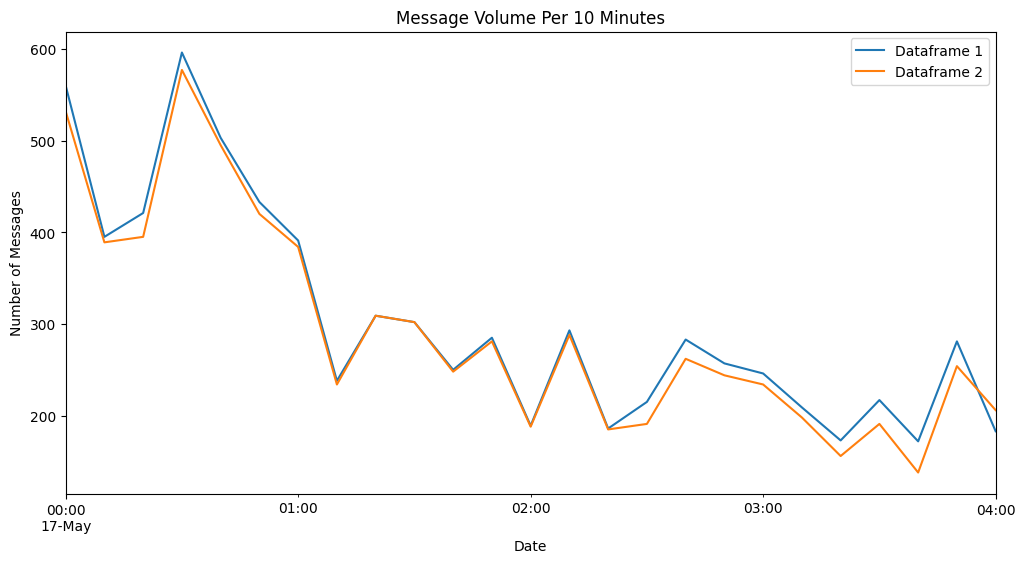

In [17]:
# Resample by 10 minutes and count messages
messages_per_10min_data1 = data1_time.resample('10min').size()
messages_per_10min_data2 = data2_time.resample('10min').size()

plt.figure(figsize=(12, 6))
messages_per_10min_data1.plot(label='Dataframe 1')
messages_per_10min_data2.plot(label='Dataframe 2')
plt.title('Message Volume Per 10 Minutes')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.legend()
plt.show()


C:\Users\Kardo\AppData\Local\Temp\ipykernel_19796\3947652347.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users_data1.index, y=top_users_data1.values, ax=axes[0], palette='viridis')
C:\Users\Kardo\AppData\Local\Temp\ipykernel_19796\3947652347.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users_data2.index, y=top_users_data2.values, ax=axes[1], palette='viridis')


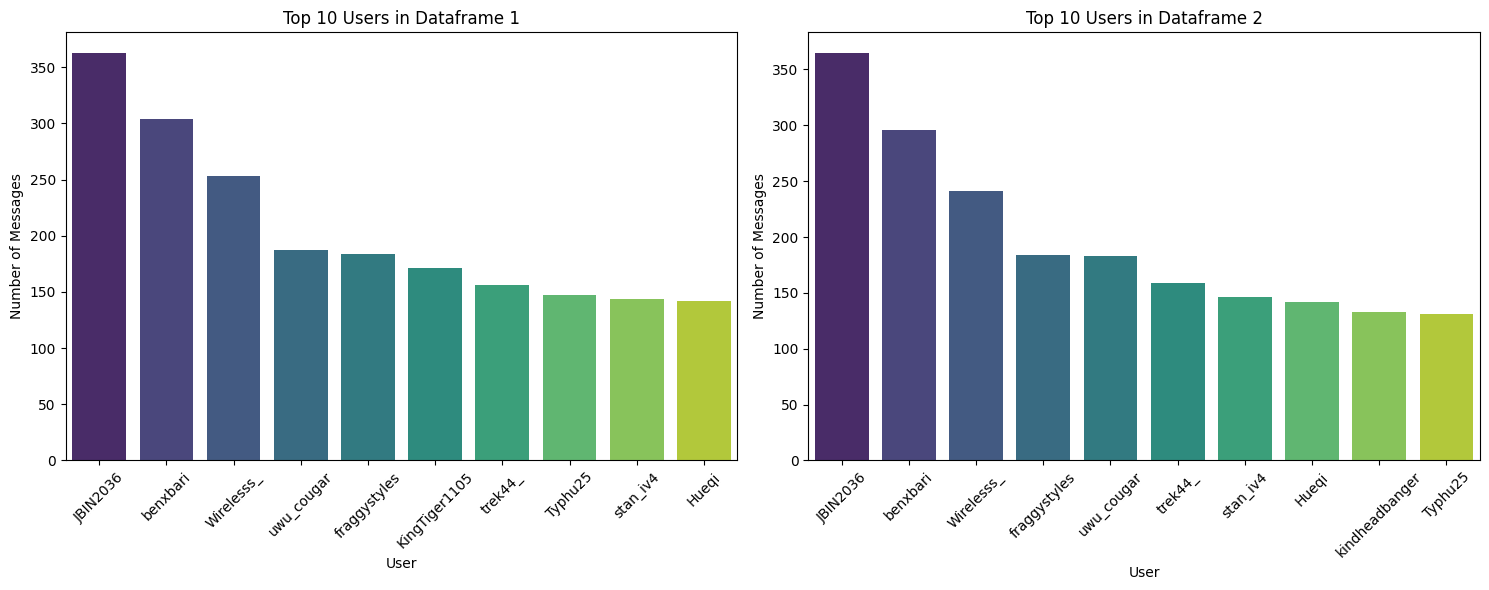

In [18]:
import seaborn as sns

# Get top N users
top_n = 10
top_users_data1 = data1['user'].value_counts().nlargest(top_n)
top_users_data2 = data2['user'].value_counts().nlargest(top_n)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=top_users_data1.index, y=top_users_data1.values, ax=axes[0], palette='viridis')
axes[0].set_title(f'Top {top_n} Users in Dataframe 1')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Number of Messages')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=top_users_data2.index, y=top_users_data2.values, ax=axes[1], palette='viridis')
axes[1].set_title(f'Top {top_n} Users in Dataframe 2')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Number of Messages')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

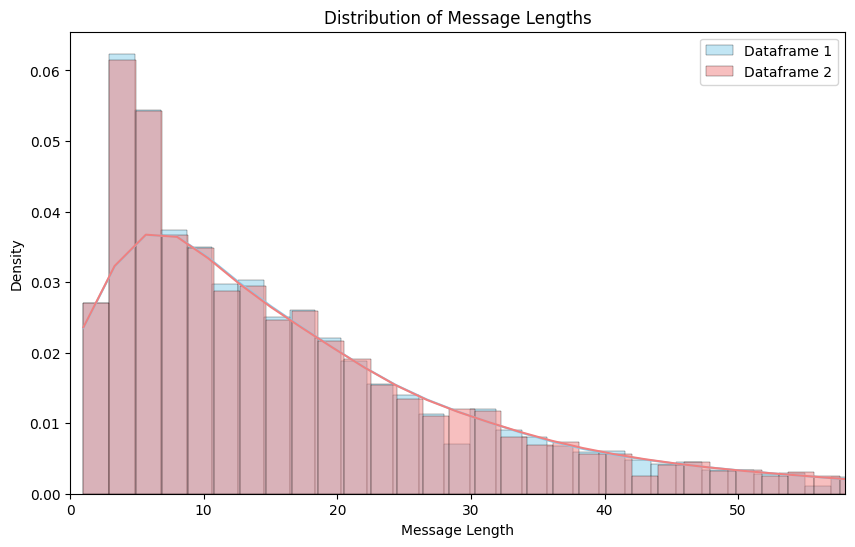

In [19]:
data1['message_length'] = data1['message'].str.len()
data2['message_length'] = data2['message'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=data1, x='message_length', color='skyblue', label='Dataframe 1', kde=True, stat='density', common_norm=False)
sns.histplot(data=data2, x='message_length', color='lightcoral', label='Dataframe 2', kde=True, stat='density', common_norm=False)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, data1['message_length'].quantile(0.95)) # Limit x-axis for better visualization
plt.show()

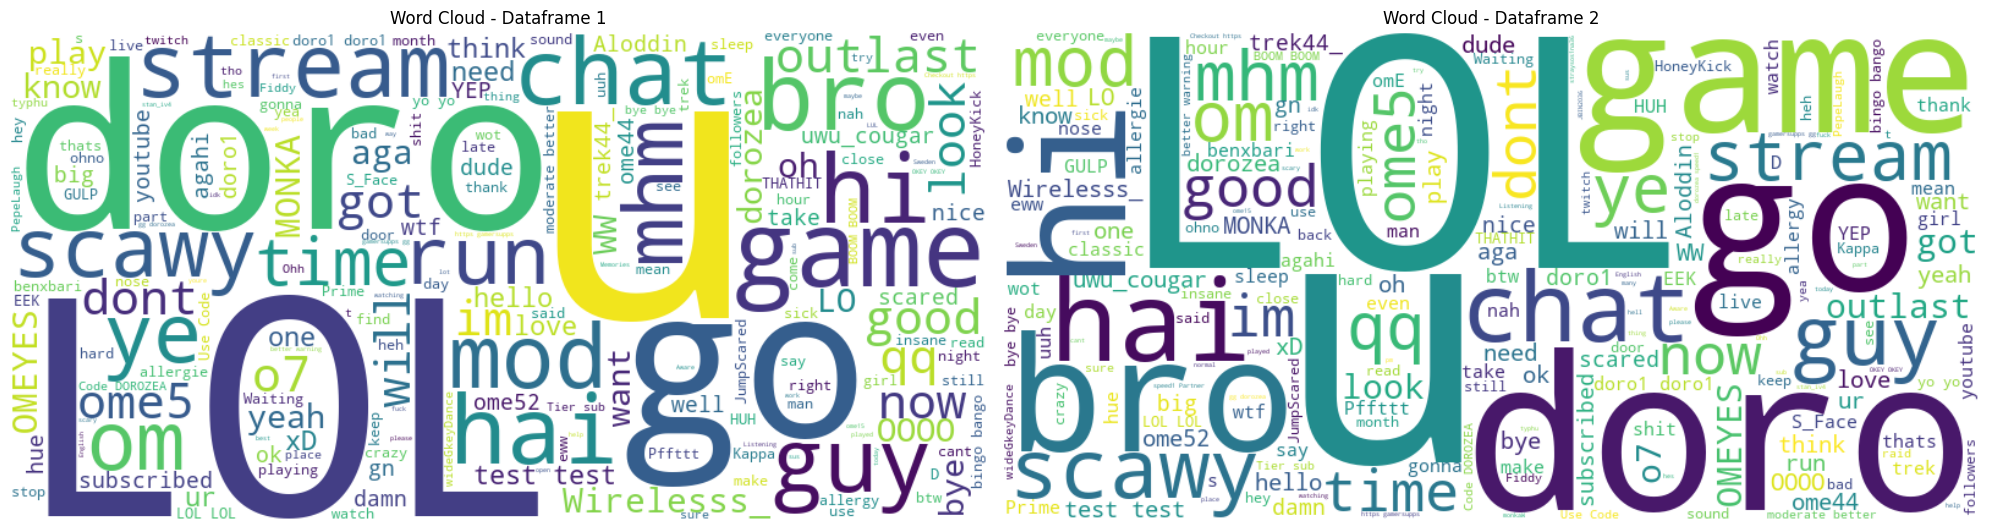

In [20]:
from wordcloud import WordCloud

# Combine all messages into a single string for each dataframe
all_messages_data1 = ' '.join(data1['message'].astype(str).tolist())
all_messages_data2 = ' '.join(data2['message'].astype(str).tolist())

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(all_messages_data1)
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('Word Cloud - Dataframe 1')
axes[0].axis('off')

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(all_messages_data2)
axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('Word Cloud - Dataframe 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()